# Calculating Entangling Power for Parameterized Quantum Circuits (PQCs)

In this tutorial, we will learn how to calcualte expressibility of Parameterized Quantum Circuits (PQCs) using qLEET, which could thought of as traversing power of a PQC in the Hilbert space. We look at different parameterized states generated by the sampled ensemble of parameters for a given PQC. We then compare the resulting distribution of state fidelities generated by this sampled ensemble to that of the ensemble of Haar random states.

We currently support two expressibility measures - **Kullback–Leibler Divergence** and **Jensen–Shannon Divergence**
$$ Expr = D_{KL}(\hat{P}_{PQC}(F; \theta) | P_{Haar}(F)) $$
$$ Expr = D_{\sqrt{JSD}}(\hat{P}_{PQC}(F; \theta) | P_{Haar}(F)) $$

In [29]:
# necessary imports 
import numpy as np
import qiskit
import qleet

## Circuit 1 - Identity

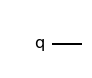

In [2]:
qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.draw("mpl")

In [3]:
params = []
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)

In [4]:
qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(
    qiskit_descriptor, samples=100
)

In [5]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.9795566834531355

In [6]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

4.6051700036233525

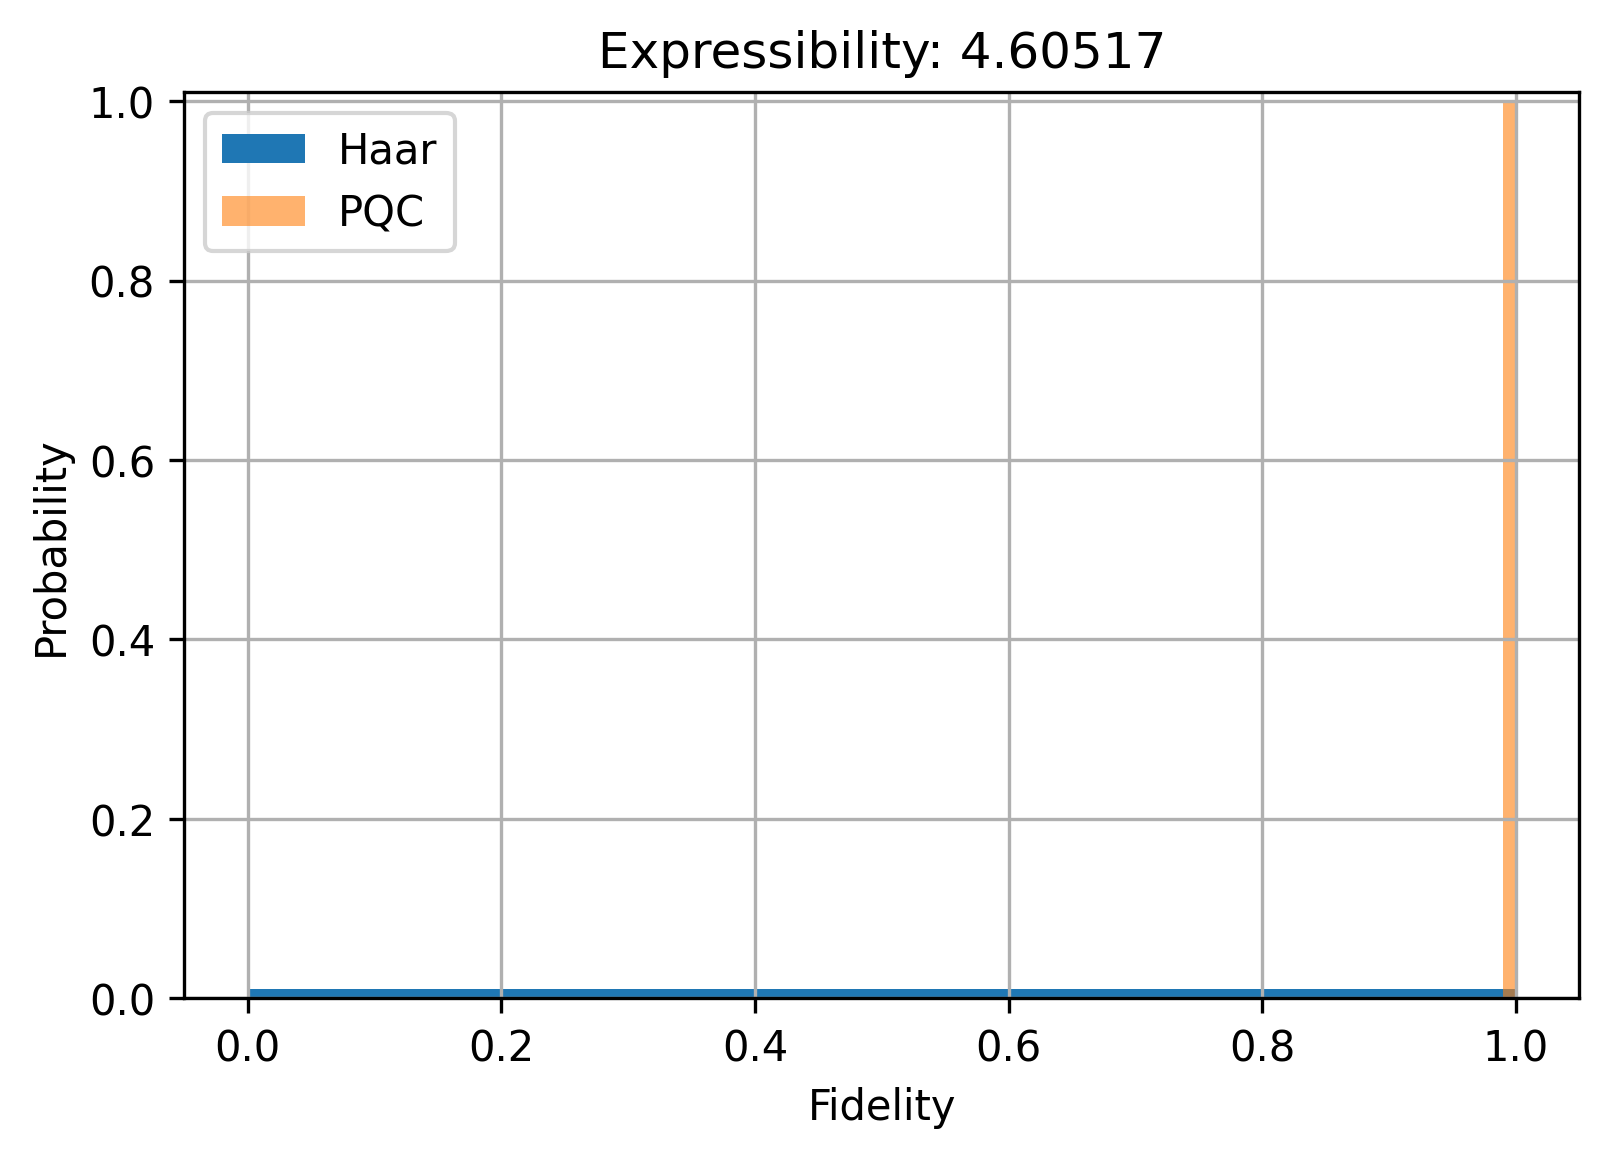

In [7]:
plt_figure = qiskit_expressibility.plot()

## Circuit 2 - H Rz

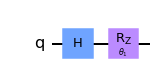

In [8]:
params = [qiskit.circuit.Parameter(r"$θ_1$")]

qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.h(0)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.draw("mpl")

In [9]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)
qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(
    qiskit_descriptor, samples=100
)

In [10]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.2433163014343637

In [11]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

0.21165646015729395

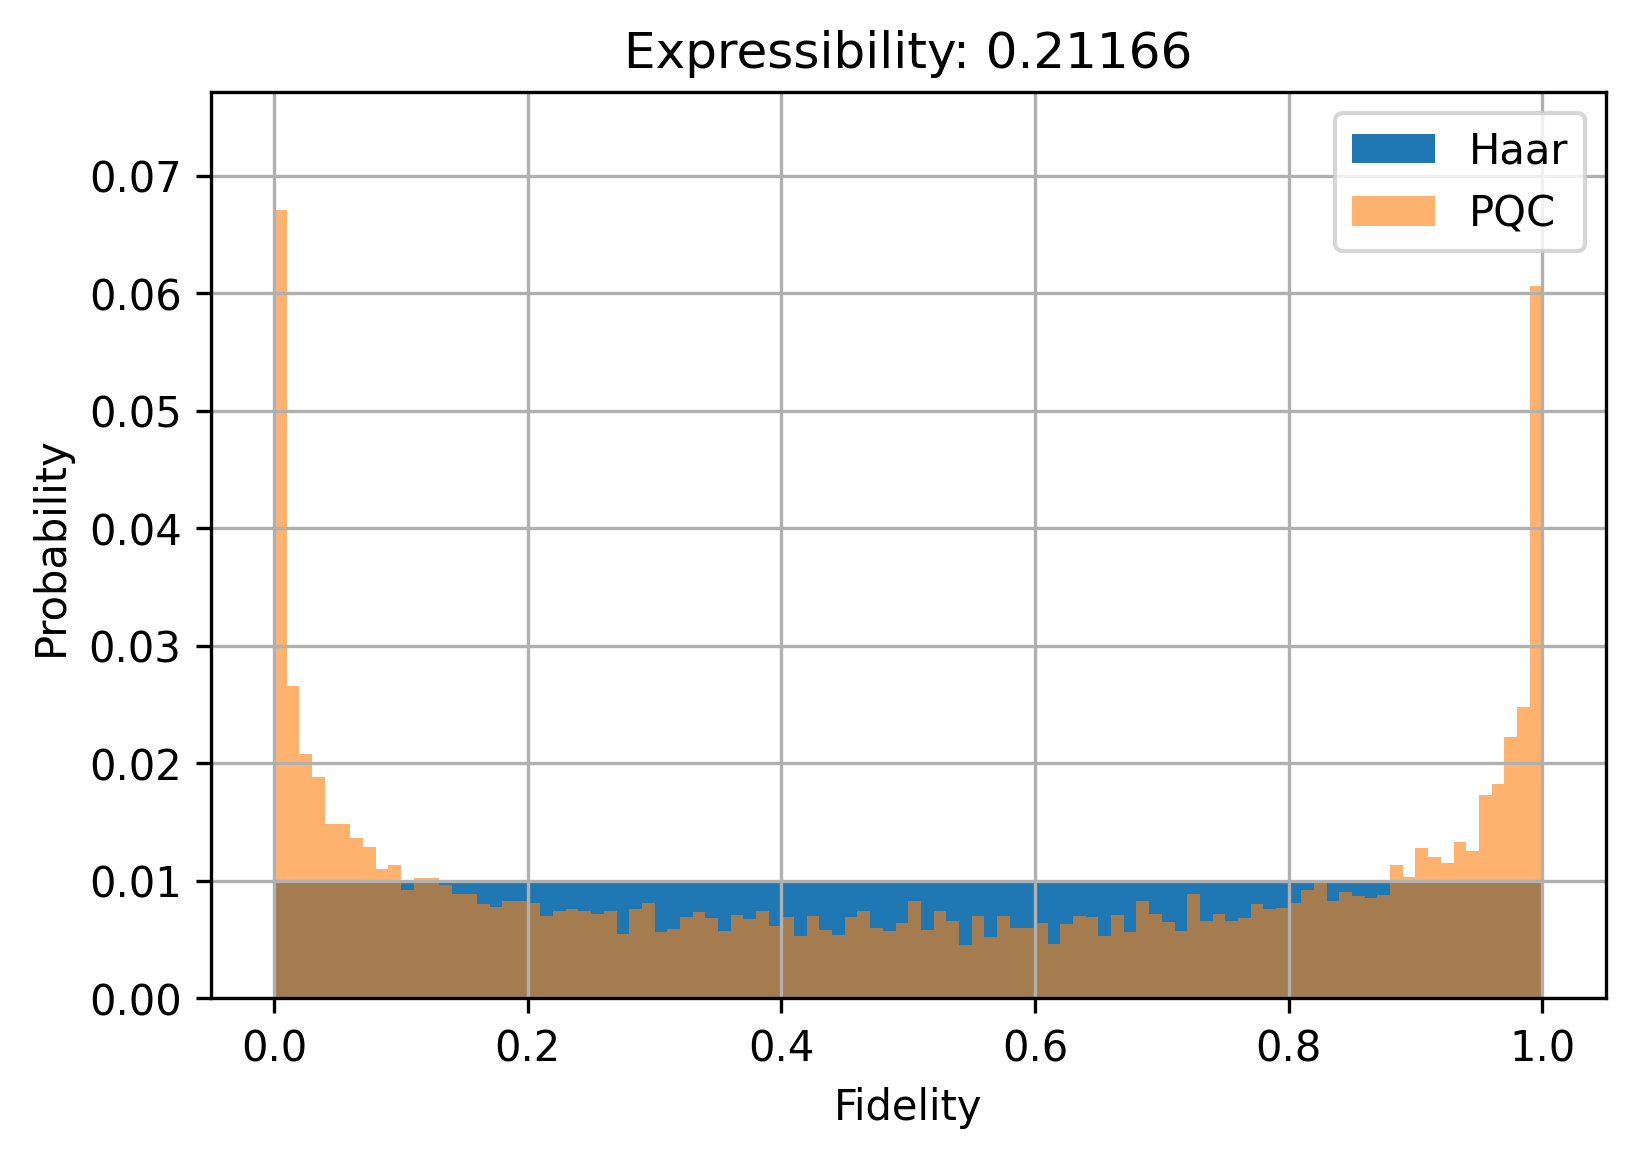

In [12]:
plt_figure = qiskit_expressibility.plot()

## Circuit 3 - H Rx Rz

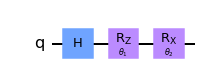

In [13]:
params = [qiskit.circuit.Parameter(r"$θ_1$"), 
          qiskit.circuit.Parameter(r"$θ_2$")]

qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.h(0)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.rx(params[1], 0)
qiskit_circuit.draw("mpl")

In [14]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)
qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(
    qiskit_descriptor, samples=100
)

In [15]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.07835008670043872

In [16]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

0.013463987891983343

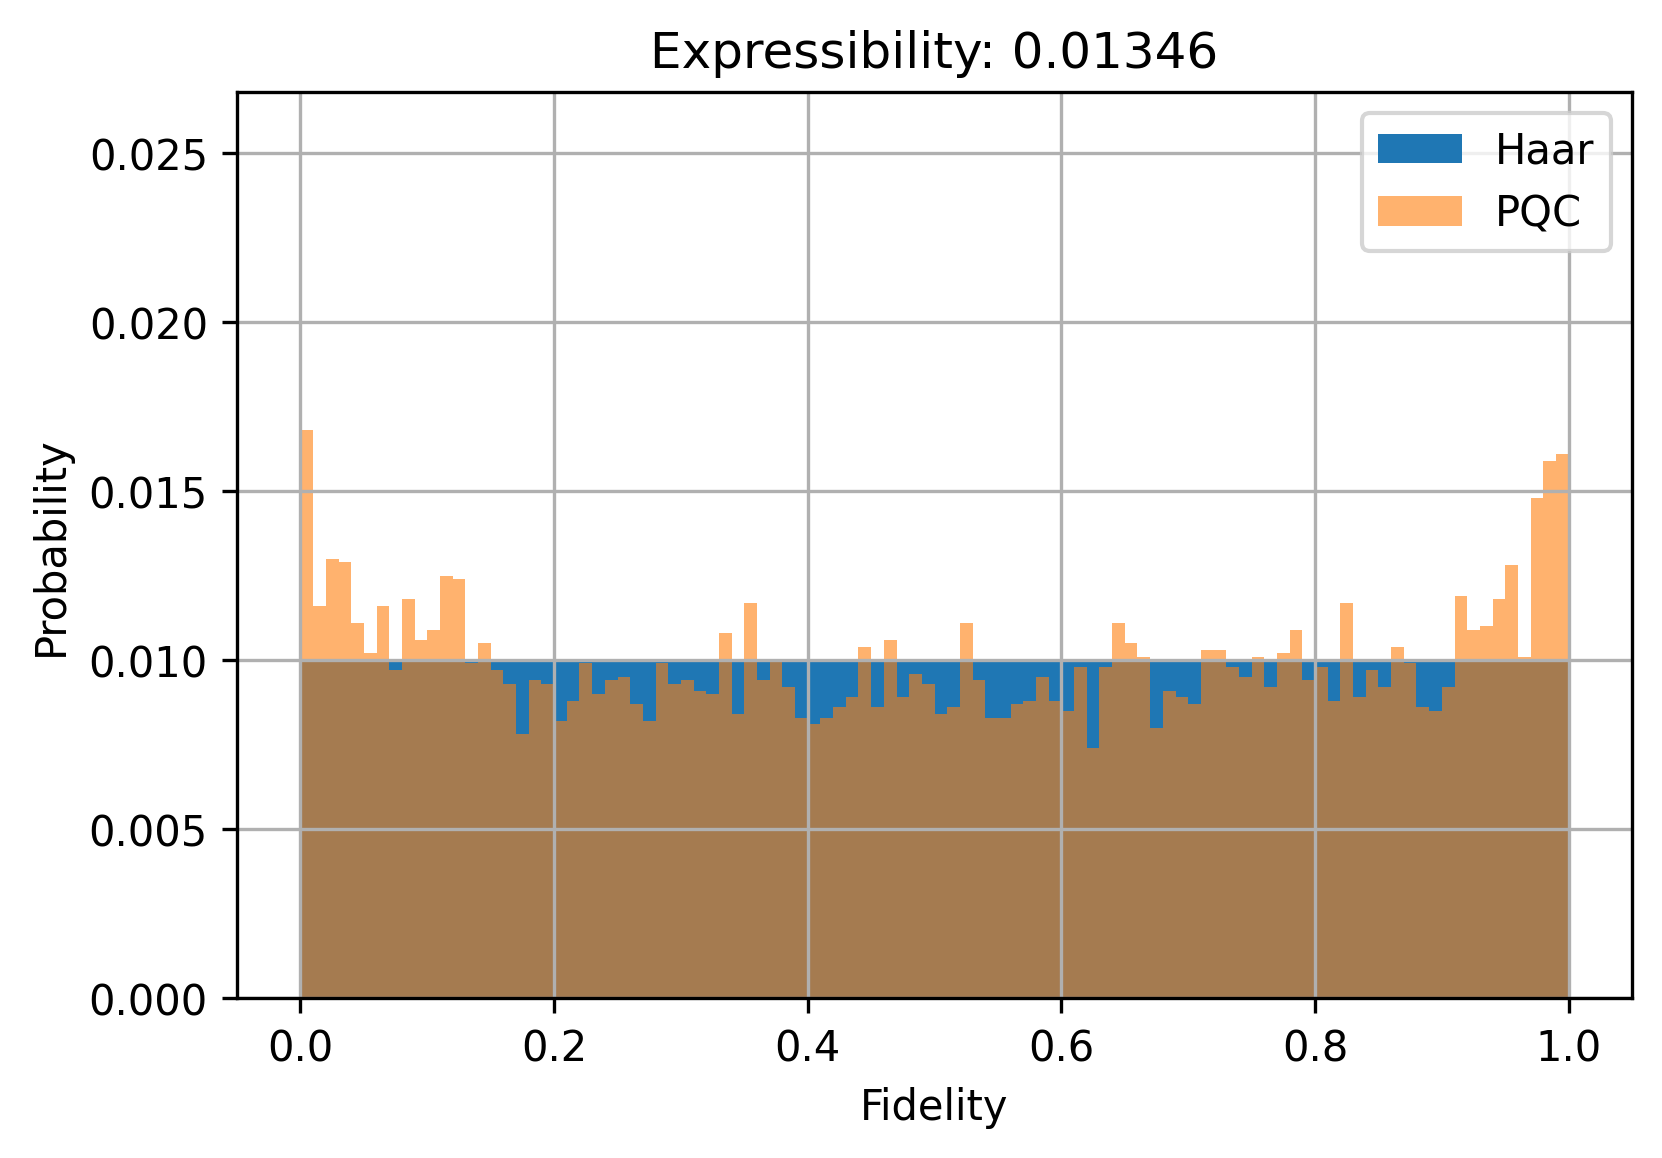

In [17]:
plt_figure = qiskit_expressibility.plot()

## Circuit 4 - Unitary U

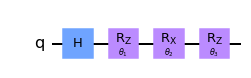

In [18]:
params = [qiskit.circuit.Parameter(r"$θ_1$"), 
          qiskit.circuit.Parameter(r"$θ_2$"), 
          qiskit.circuit.Parameter(r"$θ_3$")]

qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.h(0)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.rx(params[1], 0)
qiskit_circuit.rz(params[2], 0)
qiskit_circuit.draw("mpl")

In [19]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.08523935563837512

In [20]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

0.015842288673242125

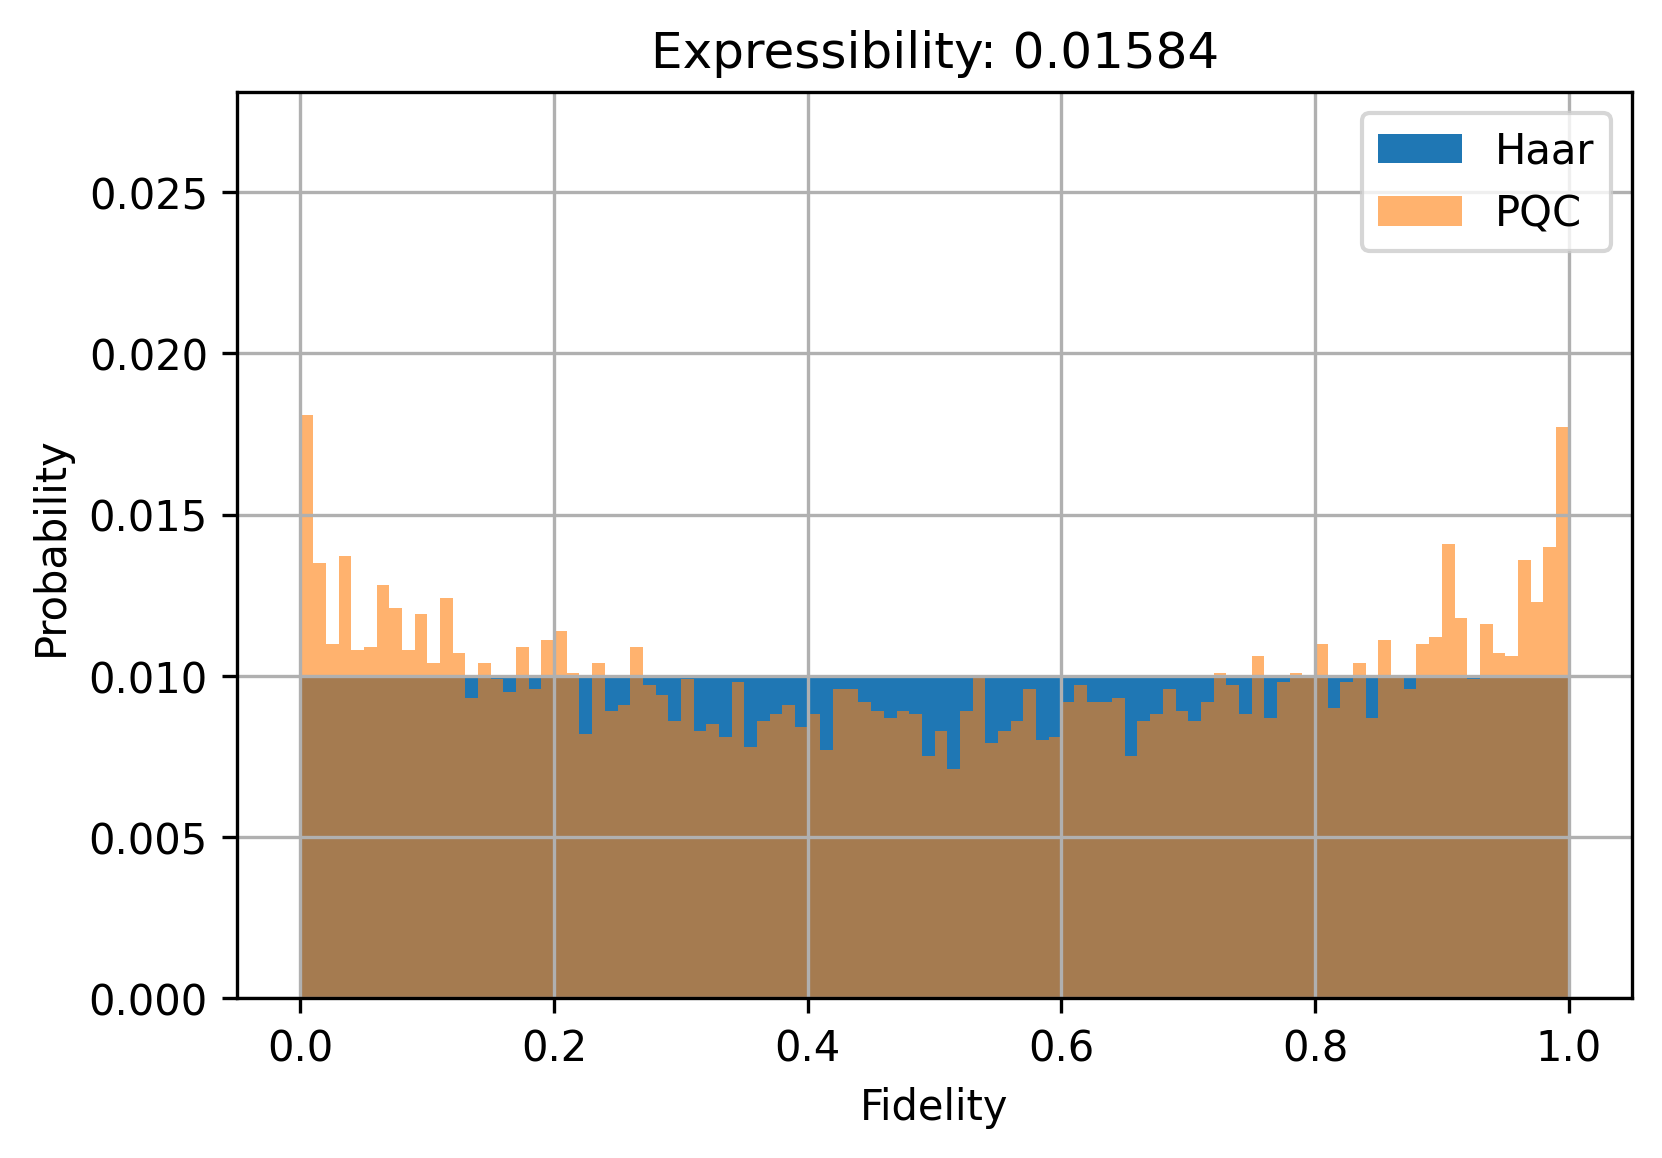

In [21]:
plt_figure = qiskit_expressibility.plot()